<a href="https://colab.research.google.com/github/NytKing/Microsoftstock/blob/main/Microsoft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
mic=pd.read_csv("https://raw.githubusercontent.com/NytKing/Microsoftstock/main/Microsoft_Stock.csv",parse_dates=["Date"],index_col="Date")
mic

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...
2021-03-25 16:00:00,235.30,236.94,231.57,232.34,34061853
2021-03-26 16:00:00,231.55,236.71,231.55,236.48,25479853
2021-03-29 16:00:00,236.59,236.80,231.88,235.24,25227455


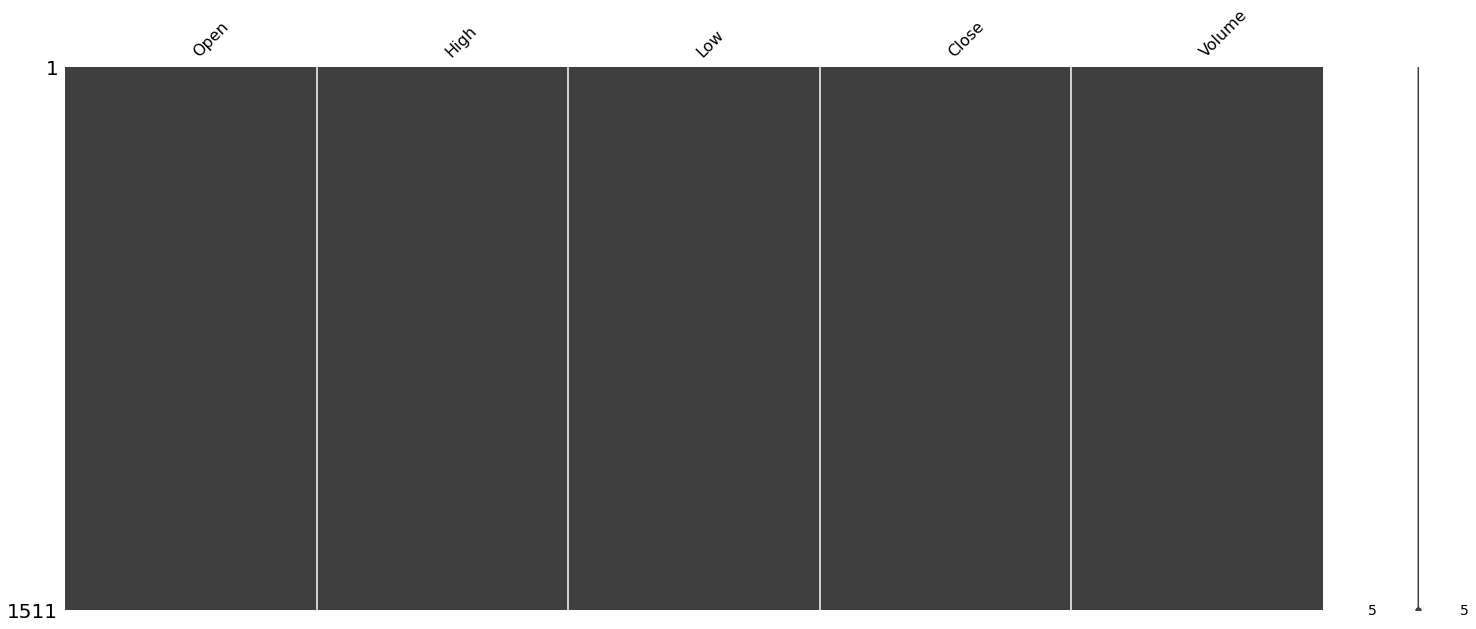

In [3]:
import missingno as miss
miss.matrix(mic)

In [4]:
mic.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [5]:
mic.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1511 entries, 2015-04-01 16:00:00 to 2021-03-31 16:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1511 non-null   float64
 1   High    1511 non-null   float64
 2   Low     1511 non-null   float64
 3   Close   1511 non-null   float64
 4   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 70.8 KB


In [6]:
print("Max open price\n")
mic[mic['Open']==mic['Open'].max()]

Max open price



,Open,High,Low,Close,Volume
Date,,,,,
2021-02-16 16:00:00,245.03,246.13,242.92,243.7,26728490


In [7]:
print("Min open price\n")
mic[mic['Open']==mic['Open'].min()]

Min open price



,Open,High,Low,Close,Volume
Date,,,,,
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692


In [8]:
print("Max high price\n")
mic[mic['High']==mic['High'].max()]

Max high price



,Open,High,Low,Close,Volume
Date,,,,,
2021-02-16 16:00:00,245.03,246.13,242.92,243.7,26728490


In [9]:
print("Min high price\n")
mic[mic['High']==mic['High'].min()]

Min high price



,Open,High,Low,Close,Volume
Date,,,,,
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476


In [10]:
print("Max low price\n")
mic[mic['Low']==mic['Low'].max()]

Max low price



,Open,High,Low,Close,Volume
Date,,,,,
2021-02-16 16:00:00,245.03,246.13,242.92,243.7,26728490


In [11]:
print("Min low price\n")
mic[mic['Low']==mic['Low'].min()]

Min low price



,Open,High,Low,Close,Volume
Date,,,,,
2015-08-24 16:00:00,40.45,43.31,39.72,41.68,88753660


In [12]:
print("Max close price\n")
mic[mic['Close']==mic['Close'].max()]

Max close price



,Open,High,Low,Close,Volume
Date,,,,,
2021-02-12 16:00:00,243.93,245.3,242.73,244.99,16561079


In [13]:
print("Min close price\n")
mic[mic['Close']==mic['Close'].min()]

Min close price



,Open,High,Low,Close,Volume
Date,,,,,
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476


In [14]:
print("Max Volume\n")
mic[mic['Volume']==mic['Volume'].max()]

Max Volume



,Open,High,Low,Close,Volume
Date,,,,,
2015-10-23 16:00:00,52.3,54.07,52.25,52.87,135227059


In [15]:
print("Min Volume\n")
mic[mic['Volume']==mic['Volume'].min()]

Min Volume



,Open,High,Low,Close,Volume
Date,,,,,
2019-12-09 16:00:00,150.99,151.87,150.27,151.75,101612


In [16]:
mic_sampled=mic[['Open', 'High', 'Low', 'Close', 'Volume']].resample("M").mean()

In [17]:
mic_sampled.describe()

,Open,High,Low,Close,Volume
count,72.000000,72.000000,72.000000,72.000000,7.200000e+01
mean,107.463334,108.515200,106.370194,107.499165,3.025303e+07
std,56.997022,57.705720,56.282525,57.014459,8.997178e+06
min,43.070952,43.736667,42.870952,43.466667,1.883351e+07
25%,58.231056,58.566817,57.897236,58.227562,2.431270e+07
50%,93.380714,94.342381,91.974048,93.056905,2.868413e+07
75%,138.650179,139.415712,137.418048,138.393908,3.433445e+07
max,239.622105,241.967368,237.451579,240.066842,7.331611e+07


In [18]:
mic_sampled

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-30,43.070952,43.736667,42.870952,43.466667,4.164453e+07
2015-05-31,47.590000,47.977000,47.185500,47.530000,3.165364e+07
2015-06-30,46.104545,46.466364,45.679545,45.964091,3.022061e+07
2015-07-31,45.484545,46.013182,45.145455,45.611818,3.297537e+07
2015-08-31,45.541905,46.120476,44.933810,45.506667,3.697607e+07
...,...,...,...,...,...
2020-11-30,214.210000,216.458000,211.854000,214.139000,2.867372e+07
2020-12-31,217.612727,219.528636,216.009091,217.963182,2.702596e+07
2021-01-31,221.942632,224.572105,219.524211,221.975263,3.410516e+07


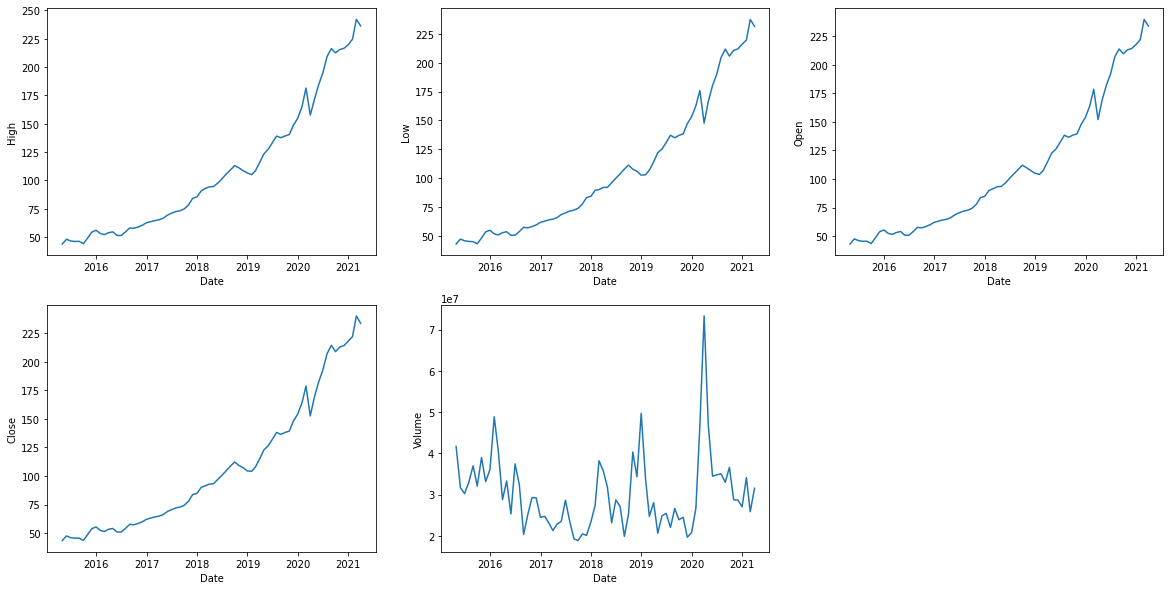

In [19]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.lineplot(data=mic_sampled["High"])
plt.subplot(2,3,2)
sns.lineplot(data=mic_sampled["Low"])
plt.subplot(2,3,3)
sns.lineplot(data=mic_sampled["Open"])
plt.subplot(2,3,4)
sns.lineplot(data=mic_sampled["Close"])
plt.subplot(2,3,5)
sns.lineplot(data=mic_sampled["Volume"])

In [20]:
def see(d1,d2,d3):
  if (d1!=0 & d2!=0):
    micm=mic[mic.index.month==d1]
    micy=micm[micm.index.year==d2]
    sns.lineplot(data=micy[[d3]])
    plt.xticks(rotation=90)
  if d1==0:
    micy=mic[mic.index.year==d2]
    sns.lineplot(data=micy[[d3]])
    plt.xticks(rotation=90)
  if d2==0:
    micm=mic[mic.index.month==d1]
    sns.lineplot(data=micm[[d3]])
    plt.xticks(rotation=90)

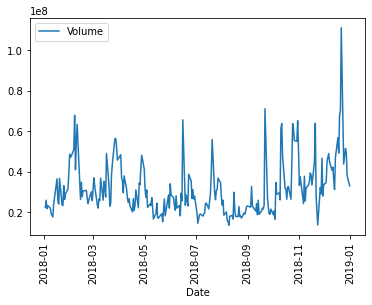

In [21]:
see(0,2018,"Volume")

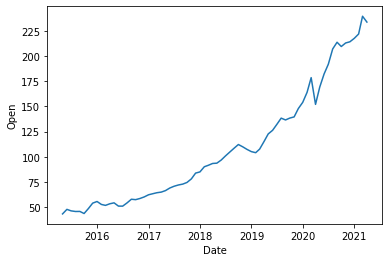

In [22]:
sns.lineplot(data=mic_sampled["Open"])

In [23]:
adfuller(mic_sampled["Open"],autolag="AIC")

(3.7274152608575704,
 1.0,
 5,
 66,
 {'1%': -3.5335601309235605,
  '10%': -2.590723948576676,
  '5%': -2.9064436883991434},
 382.1271056446724)

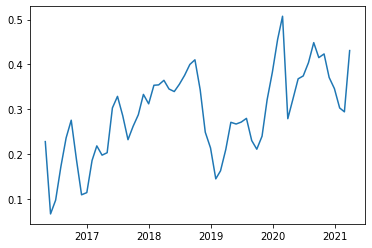

In [24]:
log_value=np.log(mic_sampled["Open"])
diff=log_value-log_value.shift(12)
diff.dropna(inplace=True)
plt.plot(diff)

In [25]:
adfuller(diff)

(-3.318401148829688,
 0.014075713807403668,
 1,
 58,
 {'1%': -3.548493559596539,
  '10%': -2.594129155766944,
  '5%': -2.912836594776334},
 -143.009376183185)

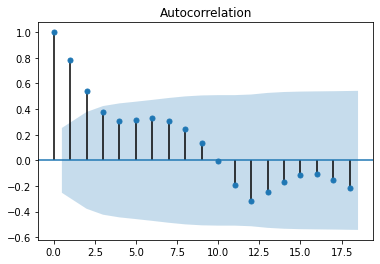

<Figure size 1440x720 with 0 Axes>

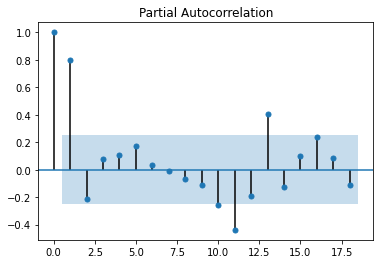

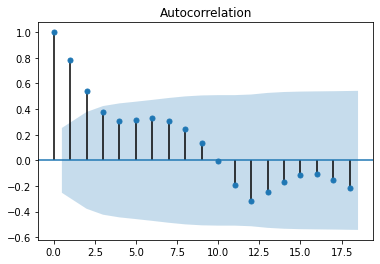

In [26]:
plt.figure(figsize=(20,10))
plot_pacf(diff)
plot_acf(diff)

In [27]:
model=ARIMA(log_value,order=(2,1,1))
result=model.fit(disp=-1)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.Open   No. Observations:                   71
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 125.534
Method:                       css-mle   S.D. of innovations              0.041
Date:                Sun, 01 Aug 2021   AIC                           -241.067
Time:                        15:14:29   BIC                           -229.754
Sample:                    05-31-2015   HQIC                          -236.568
                         - 03-31-2021                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0243      0.001     25.626      0.000       0.022       0.026
ar.L1.D.Open     0.8809      0.119      7.401      0.000       0.648       1.114
ar.L2.D.Open    -0.0951      0.127     -0.751      0.456      -0.343       0.153
ma.L1.D.Open    -1.0000      0.070    -14.388      0.000      -1.136      -0.864
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3245           +0.0000j            1.3245            0.0000
AR.2            7.9395           +0.0000j            7.9395            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [28]:
actual=pd.Series(result.fittedvalues,copy=True)
actual=actual.cumsum()
actual.head()

Date
2015-05-31    0.024335
2015-06-30    0.047765
2015-07-31    0.064860
2015-08-31    0.088863
2015-09-30    0.117229
Freq: M, dtype: float64

In [29]:
actual_log=pd.Series(log_value.iloc[0],index=log_value.index)
actual_log=actual_log.add(actual,fill_value=0)
actual_log.head()

Date
2015-04-30    3.762849
2015-05-31    3.787183
2015-06-30    3.810614
2015-07-31    3.827709
2015-08-31    3.851712
Freq: M, dtype: float64

In [30]:
actual_org=np.exp(actual_log)
actual_org

Date
2015-04-30     43.070952
2015-05-31     44.131923
2015-06-30     45.178165
2015-07-31     45.957136
2015-08-31     47.073581
                 ...    
2020-11-30    297.886598
2020-12-31    301.188916
2021-01-31    305.406366
2021-02-28    310.129988
2021-03-31    313.357189
Freq: M, Length: 72, dtype: float64

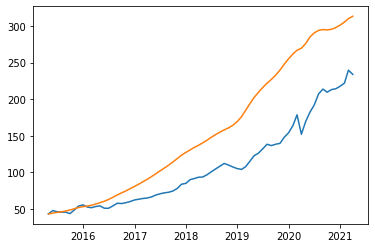

In [31]:
plt.plot(mic_sampled["Open"])
plt.plot(actual_org)

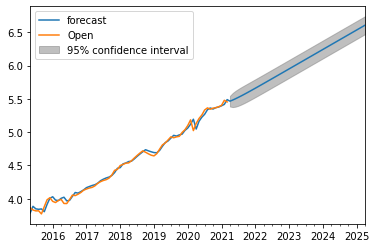

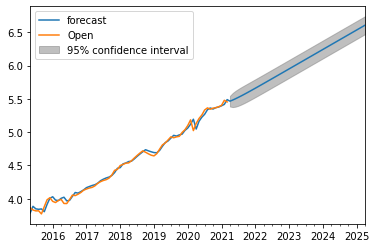

In [32]:

result.plot_predict(1,120)

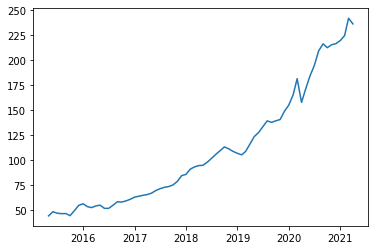

In [39]:
plt.plot(mic_sampled["High"])

In [40]:
adfuller(mic_sampled["High"])

(3.6374940312156903,
 1.0,
 5,
 66,
 {'1%': -3.5335601309235605,
  '10%': -2.590723948576676,
  '5%': -2.9064436883991434},
 377.4380188477136)

In [58]:
log_high=np.log(mic_sampled["High"])
rolling_high=log_high.rolling(12).mean()

In [59]:
diff_high=log_high-rolling_high
diff_high.dropna(inplace=True)

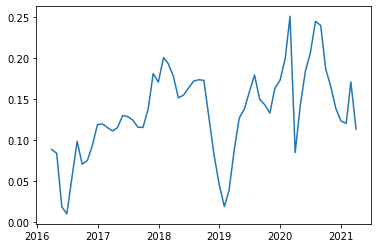

In [61]:
plt.plot(diff_high)

In [60]:
adfuller(diff_high)

(-2.7834989291295287,
 0.06066976125481957,
 0,
 60,
 {'1%': -3.5443688564814813,
  '10%': -2.5931902777777776,
  '5%': -2.9110731481481484},
 -188.37046205225343)

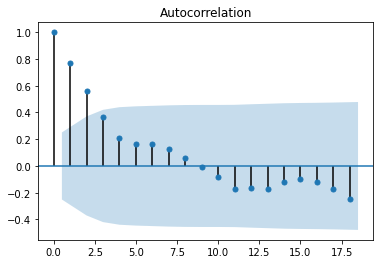

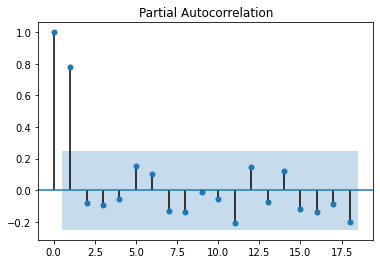

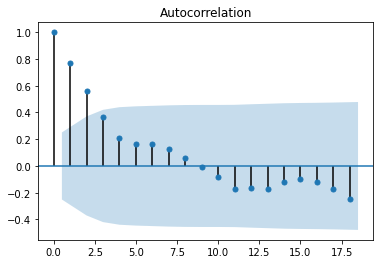

In [64]:
plot_pacf(diff_high)
plot_acf(diff_high)

In [70]:
model2=ARIMA(log_high,order=(2,0,1))
result_high=model2.fit()
result_high.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: Converge

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   High   No. Observations:                   72
Model:                     ARMA(2, 1)   Log Likelihood                 114.753
Method:                       css-mle   S.D. of innovations              0.042
Date:                Sun, 01 Aug 2021   AIC                           -219.505
Time:                        15:38:35   BIC                           -208.122
Sample:                    04-30-2015   HQIC                          -214.974
                         - 03-31-2021                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.5526        nan        nan        nan         nan         nan
ar.L1.High     1.9985   1.71e-06   1.17e+06      0.000       1.998       1.998
ar.L2.High    -0.9985   8.54e-07  -1.17e+06      0.000      -0.998      -0.998
ma.L1.High    -0.8901        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0000           +0.0000j            1.0000            0.0000
AR.2            1.0015           +0.0000j            1.0015            0.0000
MA.1            1.1234           +0.0000j            1.1234            0.0000
-----------------------------------------------------------------------------
"""

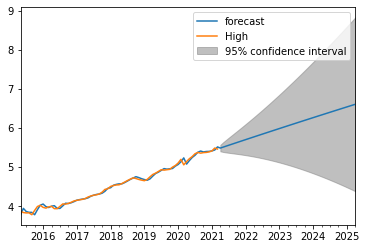

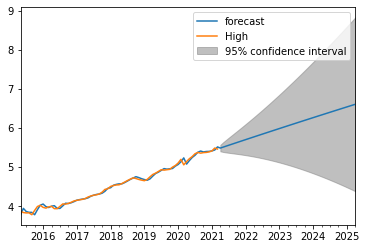

In [73]:
result_high.plot_predict(1,120)